# Lab: Predicting Digits with a Neural Net

## About MNIST Data

MNIST is a widely used dataset of hand written digits.

<img src="../assets/images/mnist-1.jpeg" />

In [1]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


Running in Google COLAB :  False


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
print ('tensorflow version:', tf.__version__)
print ('keras version:', keras.__version__)

tensorflow version: 2.2.0
keras version: 2.3.0-tf


## Step 1: Download data

In [3]:

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# backup
(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.mnist.load_data()

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


## Step 2 : Data Exploration

Displaying train index =  100
train label [100] = 5 
------------ raw data for train_image[100] -------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  2

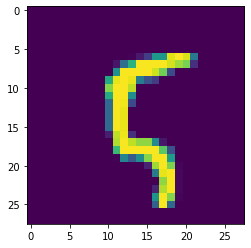

In [4]:
## Run this cell a few times to randomly display some digit data
%matplotlib inline
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 100
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])
plt.show()

## Step 3: Shape data

In [5]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

## Step 4: Create model

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:30%"/>

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


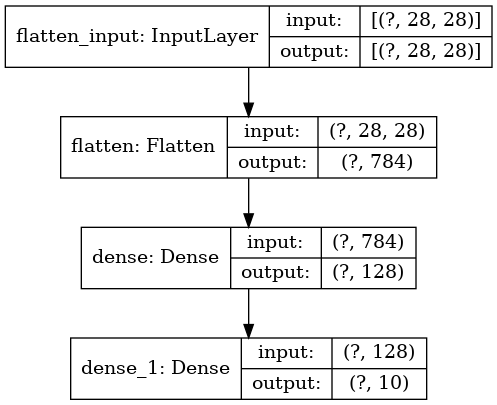

In [6]:
## Model 1

model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(units=128, activation=tf.nn.relu), 
            tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
            ])


model.compile(
  optimizer=tf.keras.optimizers.Adam(),  # 'adam'
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

print (model.summary())
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [7]:
## Model 2

# model = keras.Sequential([
#     keras.layers.Reshape(
#       target_shape=(28 * 28,), input_shape=(28, 28)
#     ),
#     keras.layers.Dense(
#       units=256, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=192, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=128, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=10, activation=tf.nn.softmax #'softmax'
#     )
# ])

# model.compile(
#   optimizer=tf.keras.optimizers.Adam(),  # 'adam'
#   loss='sparse_categorical_crossentropy',
#   metrics=['accuracy'])

# print (model.summary())

## Step 5 - Setup Tensorboard

In [8]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'mnist1'


# timestamp  = datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S")

tb_top_level_dir= '/tmp/tensorboard-logs'

tb_app_dir = os.path.join (tb_top_level_dir, app_name)

tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))


print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, write_graph=True, 
                                                      write_images=True, histogram_freq=1)

## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Saving TB logs to :  /tmp/tensorboard-logs/mnist1/18-26-47


Known TensorBoard instances:
  - port 6006: logdir /tmp/tensorboard-logs (started 3 days, 11:04:45 ago; pid 755)
  - port 6008: logdir /tmp/tensorboard-logs/mnist1/18-24-38 (started 0:02:10 ago; pid 9822)
  - port 6009: logdir /tmp/tensorboard-logs/mnist1/18-26-11 (started 0:00:36 ago; pid 9847)
  - port 6007: logdir /tmp/tensorboard-logs/mnist1/18-06-30 (started 0:20:17 ago; pid 9677)
  - port 6010: logdir /tmp/tensorboard-logs/mnist1/18-26-47 (started 0:00:00 ago; pid 9935)


## Step 6: Training the model


In [9]:
%%time

epochs=10
print ("training starting ...")

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
    callbacks=[tensorboard_callback]
)

print ("training done.")

training starting ...
Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2932 - accuracy: 0.9168 - val_loss: 0.1686 - val_accuracy: 0.9505
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1305 - accuracy: 0.9624 - val_loss: 0.1223 - val_accuracy: 0.9615
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0887 - accuracy: 0.9739 - val_loss: 0.1039 - val_accuracy: 0.9687
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0651 - accuracy: 0.9804 - val_loss: 0.1084 - val_accuracy: 0.9688
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0945 - val_accuracy: 0.9734
Epoch 6/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0907 - val_accuracy: 0.9739
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0320 - accuracy: 0.9905 - val

## Step 7 : See Training History

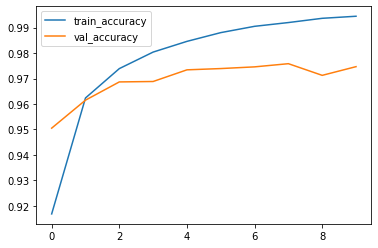

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 - Predict

**==> Compare prediction time vs training time.  Prediction is very quick!**

In [11]:
%%time 

print ("predicting on {:,} images".format(len(test_images)))
predictions = model.predict(test_images)


predicting on 10,000 images
CPU times: user 1.8 s, sys: 2.47 s, total: 4.27 s
Wall time: 403 ms


random index =  2123
test_label[2123] = 7.  So the number is 7
prediction of test_image[2123] = [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000]
max softmax output =  0.99996746
index of max softmax output = 7.  So the prediction is same (7)


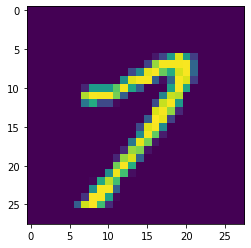

In [12]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(test_images))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, test_labels[index], test_labels[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(test_images2[index])

## Step 9 : Evaluate the Model 

### 9.1 - Metrics

In [13]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(test_images, test_labels, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.085
Metric : accuracy = 0.976


### 9.2 - Confusion Matrix

In [14]:
## our predictions is an array of arrays
print('predictions shape : ', predictions.shape)
print ('prediction 0 : ' , predictions[0])
print ('prediction 1 : ' , predictions[1])

predictions shape :  (10000, 10)
prediction 0 :  [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000]
prediction 1 :  [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]


In [15]:
## We need to find the final output (max of softmax probabilities for each prediction)
predictions2 = [ np.argmax(p) for p in predictions]
print ('prediction2 0 : ' , predictions2[0])
print ('prediction2 1 : ' , predictions2[1])

prediction2 0 :  7
prediction2 1 :  2


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions2, labels = [0,1,2,3,4,5,6,7,8,9])
cm

array([[ 973,    0,    2,    0,    0,    0,    2,    2,    1,    0],
       [   0, 1128,    3,    1,    0,    0,    1,    0,    2,    0],
       [   5,    3, 1010,    1,    2,    0,    2,    8,    1,    0],
       [   1,    0,    8,  993,    1,    1,    0,    3,    2,    1],
       [   2,    2,    3,    1,  961,    0,    3,    1,    1,    8],
       [   2,    0,    0,   20,    1,  859,    5,    2,    2,    1],
       [   8,    3,    4,    1,    4,    4,  934,    0,    0,    0],
       [   1,    5,    8,    1,    0,    0,    0, 1004,    2,    7],
       [   9,    3,    9,    7,    5,    2,    6,    5,  920,    8],
       [   2,    5,    1,    7,    6,    2,    0,    5,    0,  981]])

[]

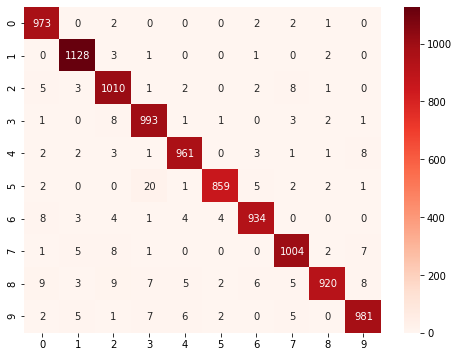

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

### 9.3 - Metrics Calculated from Confusion Matrix

In [18]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.9813414019162885,
       'precision': 0.9700897308075773,
       'recall': 0.9928571428571429,
       'support': 980},
 '1': {'f1-score': 0.9877408056042032,
       'precision': 0.9817232375979112,
       'recall': 0.9938325991189427,
       'support': 1135},
 '2': {'f1-score': 0.9711538461538463,
       'precision': 0.9637404580152672,
       'recall': 0.9786821705426356,
       'support': 1032},
 '3': {'f1-score': 0.9725759059745348,
       'precision': 0.9622093023255814,
       'recall': 0.9831683168316832,
       'support': 1010},
 '4': {'f1-score': 0.9796126401630989,
       'precision': 0.9806122448979592,
       'recall': 0.9786150712830958,
       'support': 982},
 '5': {'f1-score': 0.9761363636363636,
       'precision': 0.9896313364055299,
       'recall': 0.9630044843049327,
       'support': 892},
 '6': {'f1-score': 0.9774986917844061,
       'precision': 0.9800629590766002,
       'recall': 0.9749478079331941,
       'support': 958},
 '7': {'f1-score'

## Step 10 : Improve the Model

Try the following exercises

**1 - Increase epochs**  
- In Step-6, increase epochs to 50
- Rerun the notebook
- did the accuracy improve?
- how much the training time go up?

**2 - Build a deeper neural net** 
- IN Step-4, uncomment and use 'model-2'.  This is a wider/deeper model
- Rerun the notebook again
- did the accuracy improve?
- how much the training time go up?